In [1]:
#Importing the libraries
import pandas as pd
#To make DataReader working otherwise it won't due to compatibility error
pd.core.common.is_list_like = pd.api.types.is_list_like 
import numpy as np

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as pdr
from pandas_datareader import data

# For time stamps
from datetime import datetime

# For division
from __future__ import division

Questions:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

1.) What was the change in price of the stock over time?

In [2]:
#Company list
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#Setting up the timeframe
end = datetime.now()
start = datetime(end.year - 1, end.month,end.day)

# Extract data using Robinhood API

all_prices_ = data.get_data_robinhood((tech_list), start = start,end = end)

In [3]:
all_prices_.head(10)

close_price  high_price  interpolated   low_price  \
symbol begins_at                                                      
AAPL   2017-09-01  161.606500  162.483200         False  161.192800   
       2017-09-05  159.665800  161.803500         False  158.168500   
       2017-09-06  159.498400  160.562300         False  158.129100   
       2017-09-07  158.858100  159.823500         False  157.971500   
       2017-09-08  156.267200  158.749700         False  156.168700   
       2017-09-11  159.094500  159.636300         False  157.508500   
       2017-09-12  158.464000  161.517800         False  156.405100   
       2017-09-13  157.272000  157.577400         False  155.558000   
       2017-09-14  155.922400  157.025800         False  155.735300   
       2017-09-15  157.498600  158.572400         False  155.646600   

                   open_price session    volume  
symbol begins_at                                 
AAPL   2017-09-01  162.345300     reg  16591051  
       2017-09-05  161.311000     reg  29468495  
       2017-09-06  160.286500     reg  21651726  
       2017-09-07  159.675700     reg  21928502  
       2017-09-08  158.464000     reg  28611535  
       2017-09-11  158.109400     reg  31580798  
       2017-09-12  160.187900     reg  71714046  
       2017-09-13  157.488800     reg  44907361  
       2017-09-14  156.621900     reg  23760749  
       2017-09-15  156.109600     reg  49114602

In [4]:
columns = ['close_price','high_price','low_price','open_price','volume']

In [5]:
for company in tech_list:
    print(company)
    globals()[company] = all_prices_.loc[company]

AAPL
GOOG
MSFT
AMZN


In [6]:
for column in columns:
        AAPL[column] = AAPL[column].replace(",",".").astype("float")
for column in columns:
        GOOG[column] = GOOG[column].replace(",",".").astype("float")
for column in columns:
        MSFT[column] = MSFT[column].replace(",",".").astype("float")
for column in columns:
        AMZN[column] = AMZN[column].replace(",",".").astype("float")

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

In [7]:
AMZN.dtypes

close_price     float64
high_price      float64
interpolated       bool
low_price       float64
open_price      float64
session          object
volume          float64
dtype: object

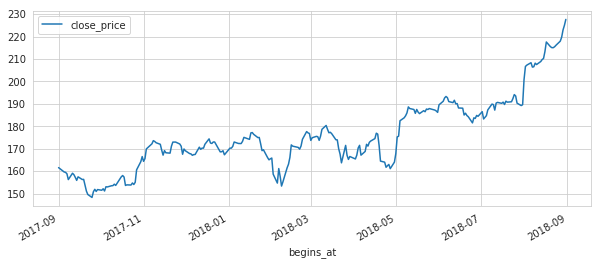

In [8]:
# Let's see a historical view of the closing price
AAPL['close_price'].plot(legend=True,figsize=(10,4))

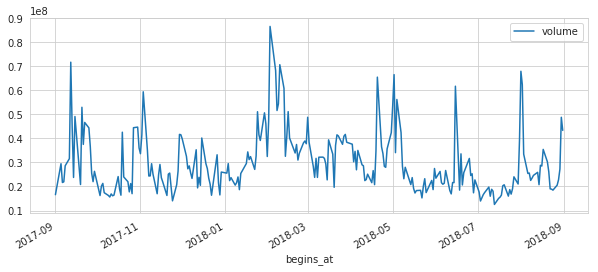

In [9]:
#Let's see the volume trades
AAPL['volume'].plot(legend=True,figsize = (10,4))

In [10]:
#Creating a list of the movering average days
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for {} days".format(ma)
    AAPL[column_name]= AAPL['close_price'].rolling(ma).mean()

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-09-01 to 2018-08-31
Data columns (total 10 columns):
close_price       252 non-null float64
high_price        252 non-null float64
interpolated      252 non-null bool
low_price         252 non-null float64
open_price        252 non-null float64
session           252 non-null object
volume            252 non-null float64
MA for 10 days    243 non-null float64
MA for 20 days    233 non-null float64
MA for 50 days    203 non-null float64
dtypes: bool(1), float64(8), object(1)
memory usage: 19.9+ KB


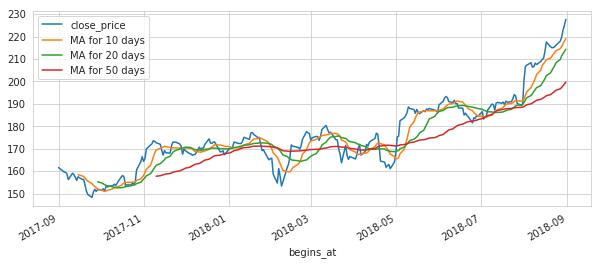

In [12]:
#Let's plot everything
AAPL[['close_price','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,legend=True,figsize=(10,4))

    2.) What was the daily return of the stock on average?

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


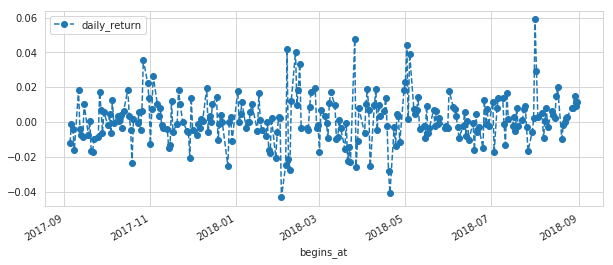

In [13]:
AAPL['daily_return'] = AAPL['close_price'].pct_change()#pct_change to have the value in percent
AAPL['daily_return'].plot(legend=True, figsize=(10,4),linestyle="--",marker="o")

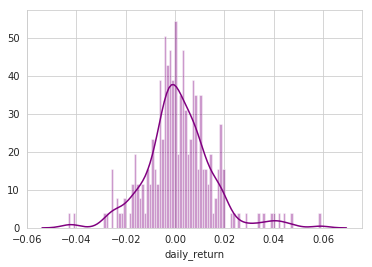

In [14]:
sns.distplot(AAPL['daily_return'].dropna(),bins=100,color="purple")

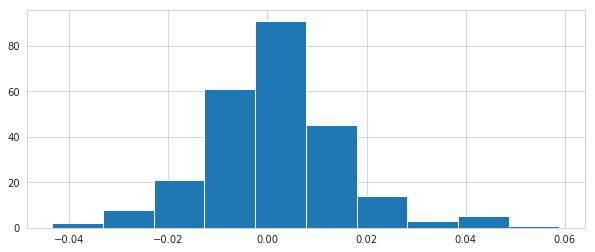

In [15]:
#Using pandas instead of Seaborn
AAPL['daily_return'].hist(figsize=(10,4))

In [16]:
#Having every closing price in one DataFrame
closing_df = pd.DataFrame(data.get_data_robinhood((tech_list), start = start,end = end)['close_price'])

In [17]:
closing_df.head(10)

close_price
symbol begins_at             
AAPL   2017-09-01  161.606500
       2017-09-05  159.665800
       2017-09-06  159.498400
       2017-09-07  158.858100
       2017-09-08  156.267200
       2017-09-11  159.094500
       2017-09-12  158.464000
       2017-09-13  157.272000
       2017-09-14  155.922400
       2017-09-15  157.498600

In [18]:
#Processing the closing_df to be able to analyse it
closing_df.reset_index(drop=False,inplace=True)

In [19]:
closing_df = closing_df.pivot(index='begins_at', columns='symbol', values='close_price')

In [21]:
for i in tech_list:
        closing_df[i] = closing_df[i].replace(",",".").astype("float")
        pd.DataFrame(closing_df)

In [23]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [24]:
tech_rets.head(10)

symbol,AAPL,AMZN,GOOG,MSFT
begins_at,,,,
2017-09-01,NaN,NaN,NaN,NaN
2017-09-05,-0.012009,-0.013269,-0.009484,-0.004462
2017-09-06,-0.001048,0.002621,-0.000689,-0.002853
2017-09-07,-0.004014,0.012058,0.008773,0.012806
2017-09-08,-0.016310,-0.013854,-0.010097,-0.004842
2017-09-11,0.018093,0.012486,0.002785,0.010544
2017-09-12,-0.003963,0.004724,0.003218,-0.001070
2017-09-13,-0.007522,0.017322,0.003240,0.007097
2017-09-14,-0.008581,-0.007393,-0.010673,-0.005850


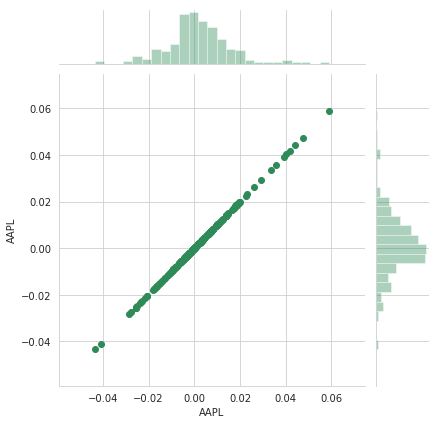

In [25]:
#let's plot them!
sns.jointplot('AAPL','AAPL',tech_rets,kind = 'scatter',color = 'seagreen')

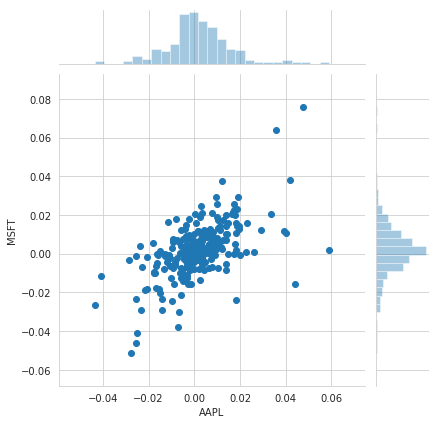

In [26]:
#Compare two companies
sns.jointplot('AAPL','MSFT',tech_rets,kind = 'scatter')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

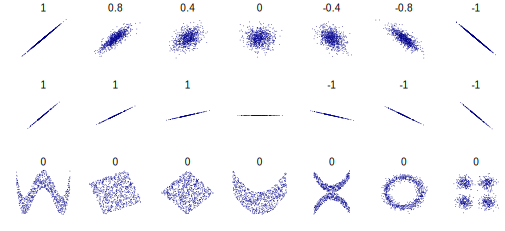

In [27]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

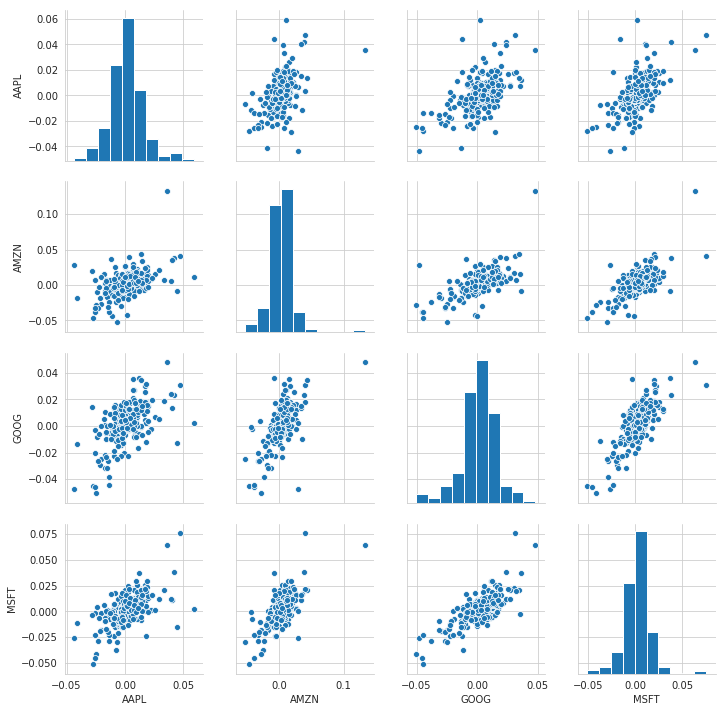

In [28]:
#To see the correlation between all the companies 
sns.pairplot(tech_rets.dropna())

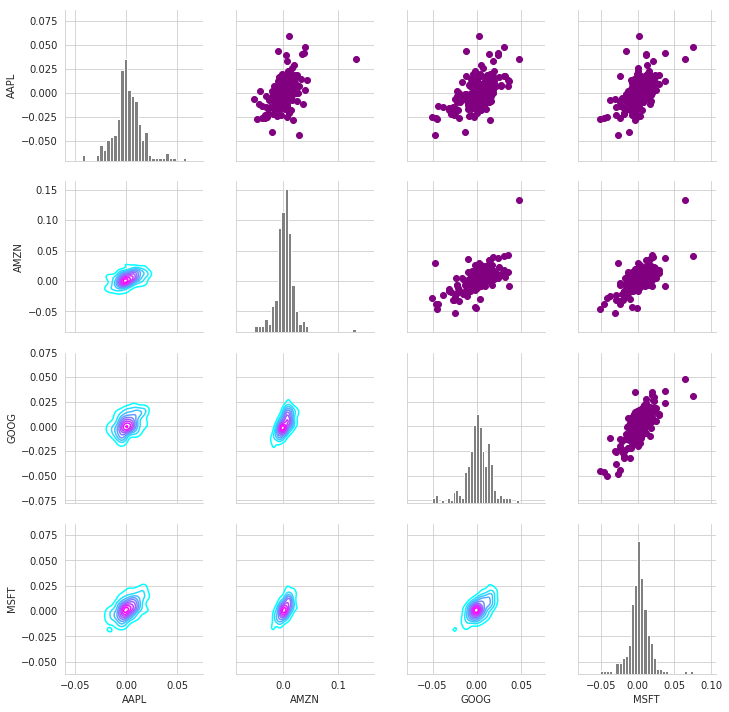

In [29]:
#Testing pairGrid to control the figures with tech_rets
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color="purple")

returns_fig.map_lower(sns.kdeplot,cmap="cool")

returns_fig.map_diag(plt.hist,color="grey",bins=30)

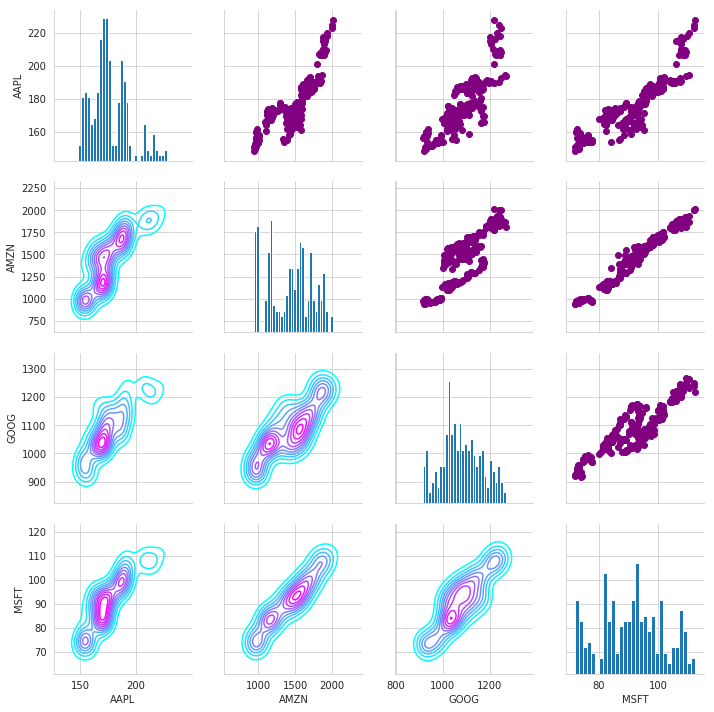

In [30]:
#Testing pairGrid to control the figures with closing_df
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color="purple")

returns_fig.map_lower(sns.kdeplot,cmap="cool")

returns_fig.map_diag(plt.hist,bins=30)

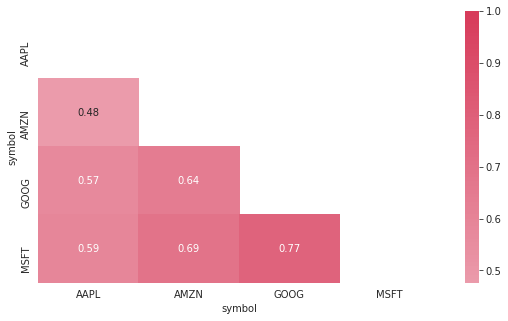

In [61]:
#Correlation for the daily returns
corr = tech_rets.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(9,5))
cmap = sns.diverging_palette(360, 5, as_cmap=True)
sns.heatmap(corr,center = 0,annot=True,mask=mask,cmap=cmap)


Risk Analysis



There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.


In [92]:
rets.mean().max()

0.0030167097786081556

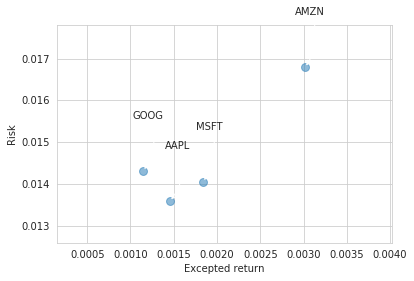

In [97]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.scatter(rets.mean(),rets.std(),s = area, alpha=0.5)

plt.ylim(rets.std().min()-0.001,rets.std().max()+0.001)
plt.xlim(rets.mean().min()-0.001,rets.mean().max()+0.001)

plt.xlabel("Excepted return")
plt.ylabel("Risk")


# http://matplotlib.org/users/annotations_guide.html
for label,x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3'))


Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.


For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

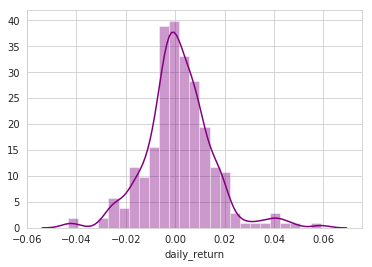

In [98]:
sns.distplot(AAPL['daily_return'].dropna(),color="purple")

In [100]:
rets['AAPL'].quantile(0.05)

-0.020720672296469955

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

In [125]:
for i in tech_list:
    print("For {}, the empirical quantile of daily returns is ".format(i) + str(rets[i].quantile(0.05)))

For AAPL, the empirical quantile of daily returns is -0.020720672296469955
For GOOG, the empirical quantile of daily returns is -0.024029496494085534
For MSFT, the empirical quantile of daily returns is -0.020784993961582177
For AMZN, the empirical quantile of daily returns is -0.023892758205169395


With 95% confidence, our worst daily loss will not exceed "rets[i].quantile(0.05)  * 100"%.
So, if we have a 1 million dollar investment, our one-day 5% VaR are:

0.020720672296469955 * 1,000,000 = $20720 for APPLE

0.24029496494085534 * 1,000,000 = $24029 for GOOGLE

0.20784993961582177 * 1,000,000 = $20784 for MICROSOFT

0.23892758205169395 * 1,000,000 = $23892 for AMAZON


Value at Risk using the Monte Carlo method


In [126]:
# Setting up our time horizon
days = 365

# The delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [132]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [128]:
GOOG.head()

,close_price,high_price,interpolated,low_price,open_price,session,volume
begins_at,,,,,,,
2017-09-01,937.34,942.480,False,935.15,941.13,reg,947374.0
2017-09-05,928.45,937.000,False,921.96,933.08,reg,1326432.0
2017-09-06,927.81,930.915,False,919.27,930.15,reg,1527650.0
2017-09-07,935.95,936.410,False,923.62,931.73,reg,1212743.0
2017-09-08,926.50,936.990,False,924.88,936.49,reg,1011538.0


Text(0.5,1,'Monte Carlo Analysis for Google')

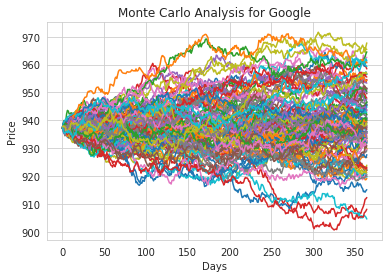

In [133]:
start_price = 937.34


for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [134]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

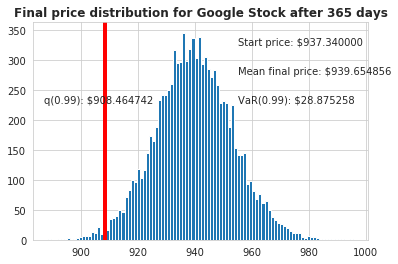

In [141]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=100)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: ${:2f}".format(start_price))

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: ${:2f}".format(simulations.mean()))

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): ${:2f}".format(start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): ${:2f}".format(q))

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after {} days".format(days), weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $28.87 for every investment of 937.34 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $28.87 at risk 99% of the time from our Monte Carlo Simulation.

Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises for you to do:

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

In [156]:
#Company list
company = ['GE']

#Setting up the timeframe
end = datetime.now()
start = datetime(end.year - 1, end.month,end.day)

GE_stock = data.get_data_robinhood(company, start = start,end = end)

In [157]:
GE_stock

close_price high_price  interpolated  low_price open_price  \
symbol begins_at                                                               
GE     2017-09-01   24.302000  24.456700         False  23.673700  23.780000   
       2017-09-05   23.925000  24.224700         False  23.752300  24.224700   
       2017-09-06   24.089300  24.186000         False  23.992700  24.060300   
       2017-09-07   23.219300  23.731700         False  23.035700  23.693000   
       2017-09-08   23.026000  23.200000         False  22.794000  23.151700   
       2017-09-11   22.929300  23.093700         False  22.832700  23.006700   
       2017-09-12   23.113000  23.113000         False  22.919700  23.026000   
       2017-09-13   23.306300  23.374000         False  23.122700  23.132300   
       2017-09-14   23.451300  23.461000         False  23.142000  23.296700   
       2017-09-15   23.363500  23.597800         False  23.187700  23.529400   
       2017-09-18   23.880900  23.968800         False  23.363500  23.392800   
       2017-09-19   23.627100  23.890700         False  23.446500  23.880900   
       2017-09-20   23.744200  23.832100         False  23.617300  23.627100   
       2017-09-21   24.164100  24.251900         False  23.597800  23.754000   
       2017-09-22   24.281200  24.447100         False  24.183600  24.251900   
       2017-09-25   24.515500  24.583900         False  24.262700  24.330000   
       2017-09-26   24.339800  24.613200         False  24.330000  24.554600   
       2017-09-27   23.793100  24.457000         False  23.705200  24.408100   
       2017-09-28   23.666100  23.871200         False  23.588000  23.812600   
       2017-09-29   23.607600  23.714900         False  23.441600  23.646600   
       2017-10-02   23.988300  24.027400         False  23.529400  23.646600   
       2017-10-03   24.212900  24.242200         False  23.754000  24.027400   
       2017-10-04   23.900500  24.300700         False  23.851600  24.291000   
       2017-10-05   23.959000  23.988300         False  23.578300  23.812600   
       2017-10-06   23.812600  23.959000         False  23.558700  23.832100   
       2017-10-09   22.875300  23.578300         False  22.699600  23.529400   
       2017-10-10   22.807000  23.290500         False  22.767900  23.138900   
       2017-10-11   22.523800  22.719100         False  22.357900  22.597100   
       2017-10-12   22.504300  22.543400         False  22.289500  22.504300   
       2017-10-13   22.436000  22.680000         False  22.416400  22.601900   
...                       ...        ...           ...        ...        ...   
       2018-07-23   12.990000  13.120000         False  12.900000  13.020000   
       2018-07-24   13.120000  13.130000         False  12.850000  12.920000   
       2018-07-25   13.110000  13.150000         False  12.960000  13.130000   
       2018-07-26   13.150000  13.270100         False  13.060000  13.100000   
       2018-07-27   13.060000  13.180000         False  12.980000  13.120000   
       2018-07-30   13.160000  13.210000         False  13.010000  13.040000   
       2018-07-31   13.630000  13.650000         False  13.160000  13.190000   
       2018-08-01   13.240000  13.550000         False  13.240000  13.550000   
       2018-08-02   13.170000  13.210000         False  13.060000  13.170000   
       2018-08-03   13.140000  13.250000         False  13.100100  13.150000   
       2018-08-06   13.100000  13.180000         False  13.060000  13.120000   
       2018-08-07   13.160000  13.250000         False  13.020000  13.120000   
       2018-08-08   13.050000  13.190000         False  12.970000  13.190000   
       2018-08-09   12.940000  13.030000         False  12.910000  13.010000   
       2018-08-10   12.770000  12.910000         False  12.710000  12.910000   
       2018-08-13   12.450000  12.730000         False  12.390000  12.720000   
       2018-08-14   12.350000  12.600000         False  12.320000  12.480000   
       2018-08-15 

In [158]:
#Processing the closing_df to be able to analyse it
GE_stock.reset_index(drop=False,inplace=True)
GE_stock_pct = GE_stock.pivot(index='begins_at', columns='symbol', values='close_price')
for i in company:
        GE_stock_pct[i] = GE_stock_pct[i].replace(",",".").astype("float")
        pd.DataFrame(GE_stock_pct)

# Make a new tech returns DataFrame
GE_stock_pct = GE_stock_pct.pct_change()

In [159]:
GE_stock_pct.head()

symbol,GE
begins_at,
2017-09-01,NaN
2017-09-05,-0.015513
2017-09-06,0.006867
2017-09-07,-0.036116
2017-09-08,-0.008325


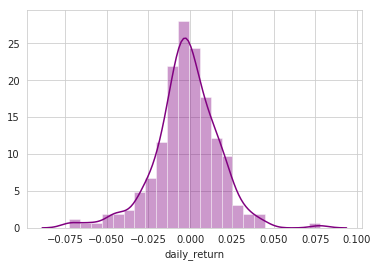

In [204]:
for column in columns:
        GE_stock[column] = GE_stock[column].replace(",",".").astype("float")
        
GE_stock['daily_return'] = GE_stock['close_price'].pct_change()#pct_change to have the value in percent


sns.distplot(GE_stock['daily_return'].dropna(),color="purple")

In [205]:
GE_stock['daily_return'].quantile(0.05)

-0.03477313922206221

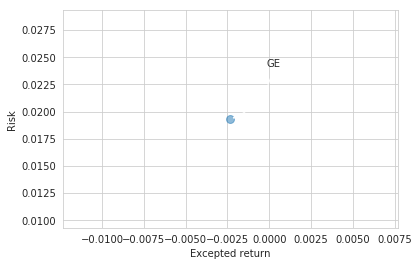

In [192]:
GE_stock_pct_withoutna = GE_stock_pct.dropna()

area = np.pi * 20

plt.scatter(GE_stock_pct_withoutna.mean(),GE_stock_pct_withoutna.std(),s = area, alpha=0.5)

plt.ylim(GE_stock_pct_withoutna.std().min()-0.01,GE_stock_pct_withoutna.std().max()+0.01)
plt.xlim(GE_stock_pct_withoutna.mean().min()-0.01,GE_stock_pct_withoutna.mean().max()+0.01)

plt.xlabel("Excepted return")
plt.ylabel("Risk")


# http://matplotlib.org/users/annotations_guide.html
for label,x, y in zip(GE_stock_pct_withoutna.columns, GE_stock_pct_withoutna.mean(), GE_stock_pct_withoutna.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3'))

The 0.05 empirical quantile of daily returns is at -0.0347. That means that with 95% confidence, our worst daily loss will not exceed 3.47%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0347 * 1,000,000 = $34700.

In [193]:
# Setting up our time horizon
days = 365

# The delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu_ge = GE_stock_pct_withoutna.mean()

# Now let's grab the volatility of the stock from the std() of the average return
sigma_ge = GE_stock_pct_withoutna.std()

In [195]:
GE_stock.head()

,symbol,begins_at,close_price,high_price,interpolated,low_price,open_price,session,volume,daily_return
0,GE,2017-09-01,24.3020,24.4567,False,23.6737,23.7800,reg,58848107.0,NaN
1,GE,2017-09-05,23.9250,24.2247,False,23.7523,24.2247,reg,44538436.0,-0.015513
2,GE,2017-09-06,24.0893,24.1860,False,23.9927,24.0603,reg,55024972.0,0.006867
3,GE,2017-09-07,23.2193,23.7317,False,23.0357,23.6930,reg,80108579.0,-0.036116
4,GE,2017-09-08,23.0260,23.2000,False,22.7940,23.1517,reg,44604454.0,-0.008325


Text(0.5,1,'Monte Carlo Analysis for GE')

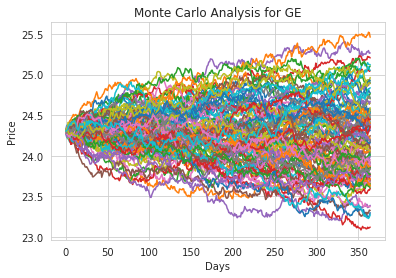

In [200]:
start_price = 24.3020


for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu_ge,sigma_ge))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for GE')

In [198]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu_ge,sigma_ge)[days-1];

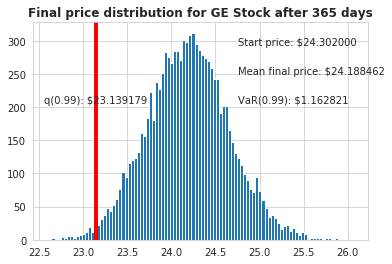

In [199]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=100)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: ${:2f}".format(start_price))

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: ${:2f}".format(simulations.mean()))

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): ${:2f}".format(start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): ${:2f}".format(q))

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for GE Stock after {} days".format(days), weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the GE stock, which looks to be $1.16 for every investment of 24.30 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $1.16 at risk 99% of the time from our Monte Carlo Simulation.

3.) Look further into correlation of two stocks and see if that gives you any insight into future possible stock prices.

In [214]:
companies_listed = ['TNDM','IIN','CDNA','TPNL','EGAN']
data_stock = data.get_data_robinhood(companies_listed,start = start,end = end)
closing_data_stock = pd.DataFrame(data.get_data_robinhood((companies_listed), start = start,end = end)['close_price'])

In [218]:
closing_data_stock.reset_index(inplace=True,drop=False)
closing_data_stock = closing_data_stock.pivot(index='begins_at', columns='symbol', values='close_price')

for i in companies_listed:
        closing_data_stock[i] = closing_data_stock[i].replace(",",".").astype("float")
        pd.DataFrame(closing_data_stock)
# Make a new tech returns DataFrame
closing_data_stock_rets = closing_data_stock.pct_change()

In [219]:
closing_data_stock_rets

symbol,CDNA,EGAN,IIN,TNDM,TPNL
begins_at,,,,,
2017-09-01,NaN,NaN,NaN,NaN,NaN
2017-09-05,-0.053571,0.057143,0.093168,-0.103875,0.000000
2017-09-06,0.075472,-0.054054,0.022727,0.002232,0.000000
2017-09-07,0.042105,0.285714,0.000000,-0.042728,0.000000
2017-09-08,0.003367,-0.066667,-0.005556,-0.181012,0.000000
2017-09-11,-0.013423,0.000000,0.145251,0.023611,0.000000
2017-09-12,-0.071429,0.000000,0.097561,-0.015782,0.000000
2017-09-13,-0.018315,0.142857,-0.022222,-0.013216,0.000000
2017-09-14,0.018657,0.062500,0.036364,-0.062143,0.000000


/home/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/alex/anaconda3/li

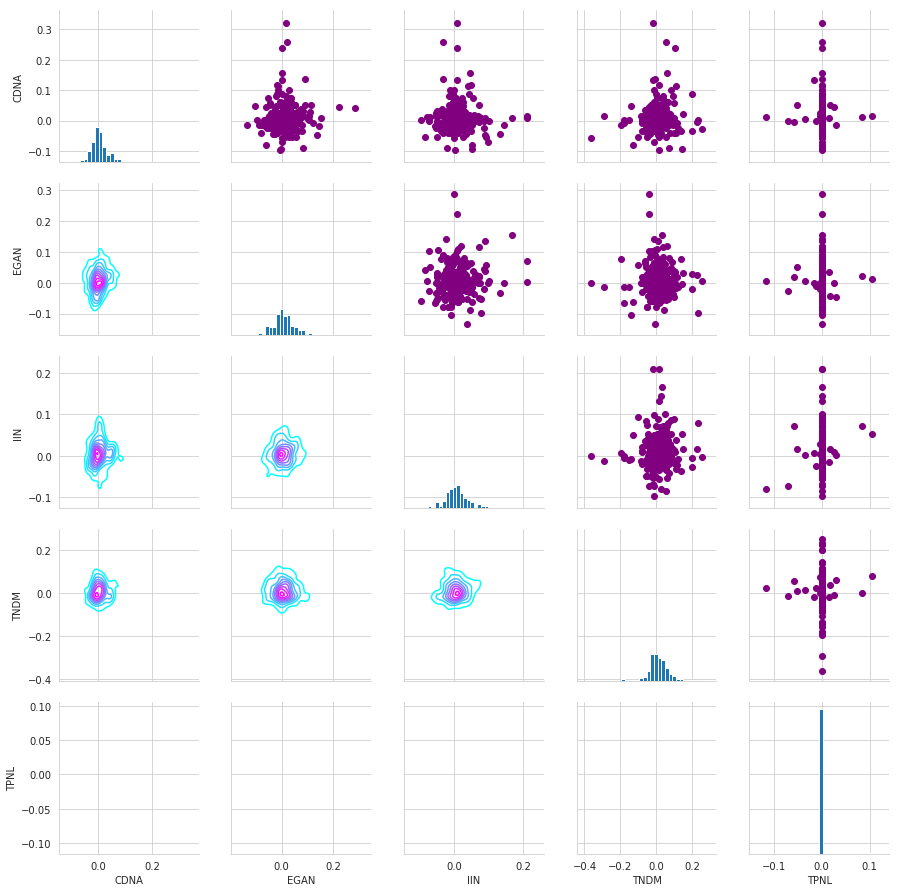

In [221]:
#Testing pairGrid to control the figures with closing_df
returns_fig = sns.PairGrid(closing_data_stock_rets.dropna())

returns_fig.map_upper(plt.scatter, color="purple")

returns_fig.map_lower(sns.kdeplot,cmap="cool")

returns_fig.map_diag(plt.hist,bins=30)

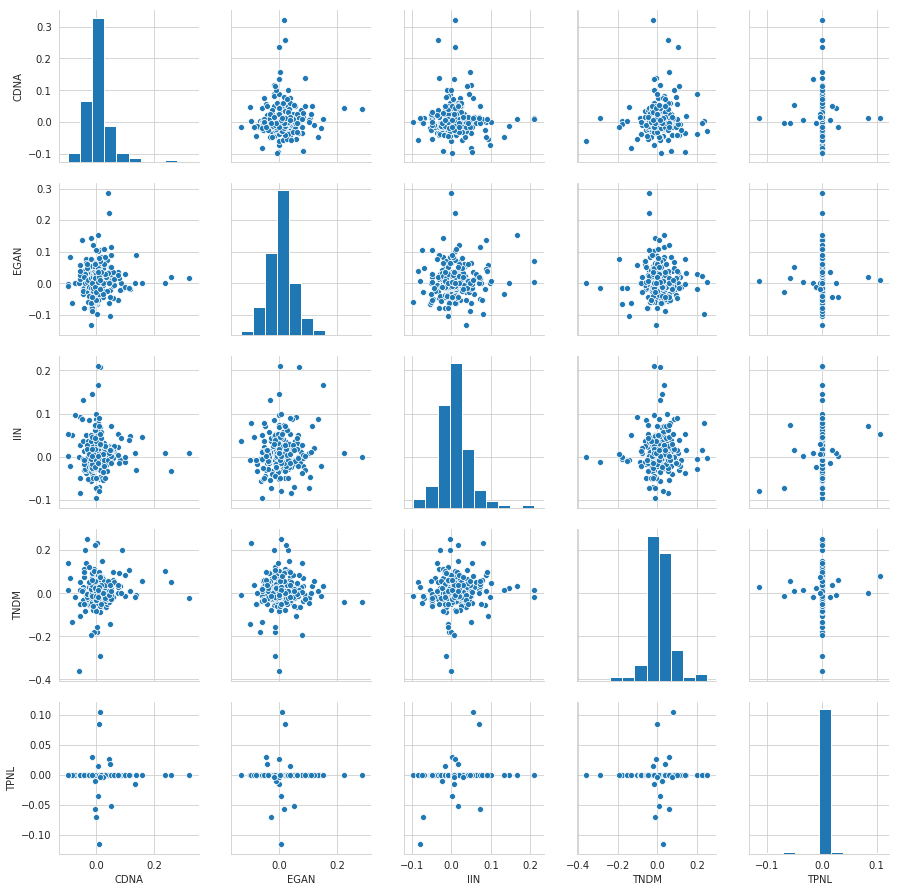

In [222]:
sns.pairplot(closing_data_stock_rets.dropna())

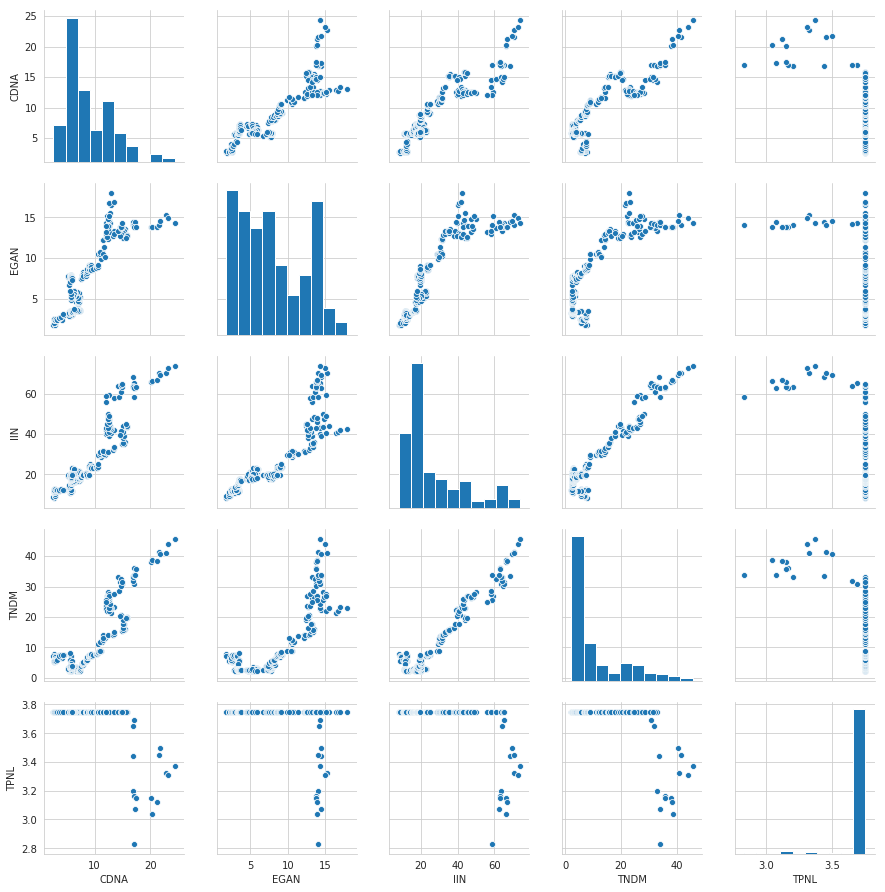

In [223]:
sns.pairplot(closing_data_stock.dropna())

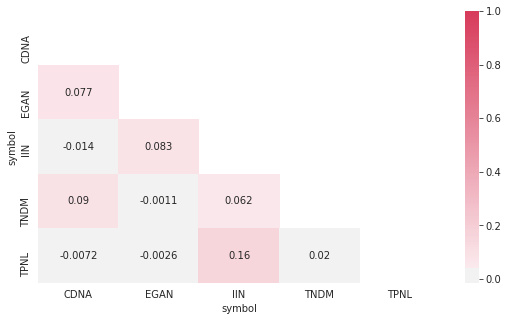

In [225]:
#Correlation for the daily returns
corr_data = closing_data_stock_rets.dropna().corr()
mask = np.zeros_like(corr_data)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(9,5))
cmap = sns.diverging_palette(360, 5, as_cmap=True)
sns.heatmap(corr_data,center = 0,annot=True,mask=mask,cmap=cmap)